In [237]:
import random
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# What

If there are a certain number of classes for each grade, and all of the kids are randomly assigned to a class each year, how long does it take before most/all students been in the same class with most/all of the other kids? 

Let's build a simulation and see.   

# Data structures

Let's represent the kids in class as a list of numbers, where each kid has a number. This lets us add new kids and remove other kids just by adding and removing numbers from the list. We'll start counting at 1, leaving 0 to signify other things if we want.

In [216]:
# constants
NUMBER_KIDS_START = 20
NUMBER_CLASSES = 2

In [217]:
kids = list(range(1, NUMBER_KIDS_START + 1))
kids

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Simulate class assignment

We'll write a function that takes a list of kids and a number of classes and randomly assigns kids to each class, returning a list of lists with a list per class. If there are fewer kids than the number of classes would need, both classes are reduced in size/get approximately the same number of students (within one).

In [218]:
def assign_kids(kids, number_of_classes):
    kids_working = kids.copy()
    classes = [ [] for i in range(number_of_classes)]
    kids_per_class = math.ceil(len(kids_working) / number_of_classes)
    
    for i in range(len(classes)):
        #print(i), print(len(kids_working))
        if len(kids_working) < kids_per_class:
            kids_per_class = len(kids_working)
            
        classes[i] = random.sample(kids_working, kids_per_class)
        kids_working = [kid for kid in kids_working if kid not in classes[i]]  
        
    return classes

In [219]:
assign_kids(kids, 2)

[[3, 4, 17, 19, 20, 12, 16, 5, 15, 14], [7, 6, 18, 2, 13, 1, 8, 9, 11, 10]]

In [220]:
assign_kids(kids, 2)

[[7, 3, 16, 5, 12, 19, 15, 9, 10, 18], [1, 14, 13, 11, 17, 6, 8, 2, 20, 4]]

In [221]:
assign_kids(kids, 3)

[[5, 12, 11, 2, 10, 18, 9], [14, 19, 13, 15, 8, 17, 4], [7, 16, 6, 1, 20, 3]]

In [222]:
assign_kids([1, 2, 3, 4, 5], 2)

[[3, 1, 2], [5, 4]]

# First cut at multiple years, without kids coming or going

In [269]:
NUMBER_OF_YEARS = 3

classes_by_year = [ [] for i in range(NUMBER_OF_YEARS)]

for i in range(len(classes_by_year)):
    classes_by_year[i] = assign_kids(kids, NUMBER_CLASSES)
    
classes_by_year

[[[2, 5, 10, 13, 6, 4, 1, 3, 18, 17], [14, 16, 19, 11, 12, 15, 9, 8, 20, 7]],
 [[4, 5, 20, 6, 14, 17, 12, 8, 11, 18], [9, 1, 7, 19, 2, 10, 16, 3, 13, 15]],
 [[3, 20, 14, 10, 6, 1, 12, 13, 5, 4], [16, 17, 7, 2, 11, 18, 15, 19, 9, 8]]]

# Some basic analysis using the data

For each kid, how many other kids have been in their class? For this, let's try checking, for each kid/number, how many other numbers have been in the same list with them.

In [270]:
def flatten_list(l):
    return sum(l, [])

In [271]:
flatten_list([ [1, 2], [3, 4]])

[1, 2, 3, 4]

In [272]:
flatten_list(classes_by_year)

[[2, 5, 10, 13, 6, 4, 1, 3, 18, 17],
 [14, 16, 19, 11, 12, 15, 9, 8, 20, 7],
 [4, 5, 20, 6, 14, 17, 12, 8, 11, 18],
 [9, 1, 7, 19, 2, 10, 16, 3, 13, 15],
 [3, 20, 14, 10, 6, 1, 12, 13, 5, 4],
 [16, 17, 7, 2, 11, 18, 15, 19, 9, 8]]

In [273]:
def get_kids_with_this_kid(this_kid, classes_by_year):
    kids_with_this_kid = set()

    for this_class in flatten_list(classes_by_year):
        # is this kid in this class? if yes, we'll remember which kids are in the same class 
        if this_kid in this_class:
            kids_with_this_kid.update(this_class)

    # and remove the kid from the set, since he's not in class with himself
    kids_with_this_kid.remove(this_kid)

    return kids_with_this_kid

In [274]:
get_kids_with_this_kid(5, classes_by_year)

{1, 2, 3, 4, 6, 8, 10, 11, 12, 13, 14, 17, 18, 20}

In [275]:
get_kids_with_this_kid(6, classes_by_year)

{1, 2, 3, 4, 5, 8, 10, 11, 12, 13, 14, 17, 18, 20}

In [276]:
get_kids_with_this_kid(7, classes_by_year)

{1, 2, 3, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}

In just one run/one set of years, what's the distribution of counts of kids?

In [277]:
counts_of_classmates = [len(get_kids_with_this_kid(kid, classes_by_year)) for kid in kids]
counts_of_classmates

[17,
 16,
 17,
 14,
 14,
 14,
 16,
 15,
 16,
 17,
 15,
 18,
 17,
 18,
 16,
 16,
 19,
 19,
 16,
 18]

(array([3., 0., 2., 0., 6., 0., 4., 0., 3., 2.]),
 array([14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. ]),
 <a list of 10 Patch objects>)

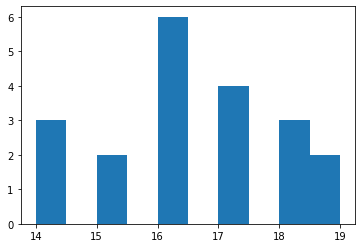

In [278]:
plt.hist(counts_of_classmates)

# Put it all together

(Yeah, I copied and pasted - this was quick so I could show Willie everything in one fell swoop.)

56
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
[[[55, 19, 33, 50, 53, 37, 13, 34, 16, 24, 25, 42, 2, 17, 29, 48, 36, 21, 18, 14, 41, 44, 49, 35, 27, 3, 10, 52], [28, 7, 9, 22, 11, 39, 38, 32, 31, 47, 15, 6, 5, 51, 23, 1, 30, 40, 8, 56, 45, 12, 4, 46, 54, 20, 26, 43]], [[53, 24, 36, 25, 8, 18, 51, 47, 30, 54, 12, 31, 21, 52, 46, 13, 14, 26, 5, 50, 48, 2, 32, 35, 55, 29, 40, 33], [38, 19, 42, 17, 44, 9, 6, 28, 22, 41, 49, 39, 10, 4, 7, 1, 45, 15, 3, 23, 11, 16, 37, 43, 56, 27, 20, 34]], [[54, 30, 50, 48, 29, 16, 11, 15, 36, 6, 2, 26, 13, 46, 52, 33, 55, 47, 32, 44, 27, 49, 35, 12, 34, 40, 3, 8], [21, 10, 51, 19, 25, 4, 22, 23, 28, 24, 53, 14, 42, 1, 37, 17, 5, 56, 9, 39, 43, 18, 45, 41, 38, 7, 31, 20]], [[53, 52, 36, 16, 6, 49, 23, 7, 1, 13, 26, 38, 8, 3, 34, 10, 25, 35, 46, 48, 50, 32, 31, 28, 5, 21, 14, 43], [2, 11, 

(array([ 3.,  0.,  0., 10.,  0.,  0., 23.,  0.,  0., 20.]),
 array([52. , 52.3, 52.6, 52.9, 53.2, 53.5, 53.8, 54.1, 54.4, 54.7, 55. ]),
 <a list of 10 Patch objects>)

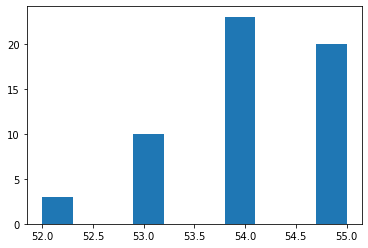

In [291]:
NUMBER_CLASSES = 2
NUMBER_KIDS_START = NUMBER_CLASSES * 28
NUMBER_OF_YEARS = 6

print(NUMBER_KIDS_START)

kids = list(range(1, NUMBER_KIDS_START + 1))
print(kids)

classes_by_year = [ [] for i in range(NUMBER_OF_YEARS)]

for i in range(len(classes_by_year)):
    classes_by_year[i] = assign_kids(kids, NUMBER_CLASSES)
    
print(classes_by_year)

counts_of_classmates = [len(get_kids_with_this_kid(kid, classes_by_year)) for kid in kids]
print(counts_of_classmates)

plt.hist(counts_of_classmates)